In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense


In [2]:
# ---------------------------
# Load & Preprocess Data
# ---------------------------
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalize to [0,1] and flatten
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape((len(x_train), -1))  # (60000, 784)
x_test = x_test.reshape((len(x_test), -1))    # (10000, 784)

In [6]:
# ---------------------------
# Build Autoencoder
# ---------------------------
encoding_dim = 64  # latent space dimension
# Encoder
input_img = Input(shape=(784,))
encoded = Dense(128, activation="relu")(input_img)
encoded = Dense(64, activation="relu")(encoded)
latent = Dense(encoding_dim, activation="relu")(encoded)
# Decoder
decoded = Dense(64, activation="relu")(latent)
decoded = Dense(128, activation="relu")(decoded)
decoded = Dense(784, activation="sigmoid")(decoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

In [7]:
# ---------------------------
# Train Autoencoder
# ---------------------------
history = autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test),
    verbose=2
)


Epoch 1/20
235/235 - 7s - 31ms/step - loss: 0.2410 - val_loss: 0.1607
Epoch 2/20
235/235 - 4s - 16ms/step - loss: 0.1456 - val_loss: 0.1330
Epoch 3/20
235/235 - 4s - 16ms/step - loss: 0.1280 - val_loss: 0.1200
Epoch 4/20
235/235 - 6s - 27ms/step - loss: 0.1169 - val_loss: 0.1114
Epoch 5/20
235/235 - 4s - 16ms/step - loss: 0.1104 - val_loss: 0.1074
Epoch 6/20
235/235 - 4s - 16ms/step - loss: 0.1059 - val_loss: 0.1032
Epoch 7/20
235/235 - 5s - 21ms/step - loss: 0.1023 - val_loss: 0.0996
Epoch 8/20
235/235 - 4s - 16ms/step - loss: 0.0994 - val_loss: 0.0970
Epoch 9/20
235/235 - 4s - 15ms/step - loss: 0.0974 - val_loss: 0.0953
Epoch 10/20
235/235 - 5s - 21ms/step - loss: 0.0958 - val_loss: 0.0938
Epoch 11/20
235/235 - 4s - 17ms/step - loss: 0.0946 - val_loss: 0.0927
Epoch 12/20
235/235 - 4s - 16ms/step - loss: 0.0933 - val_loss: 0.0916
Epoch 13/20
235/235 - 6s - 27ms/step - loss: 0.0922 - val_loss: 0.0906
Epoch 14/20
235/235 - 4s - 16ms/step - loss: 0.0914 - val_loss: 0.0901
Epoch 15/20
235

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 679,538 (2.59 MB)

 Trainable params: 226,512 (884.81 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 453,026 (1.73 MB)

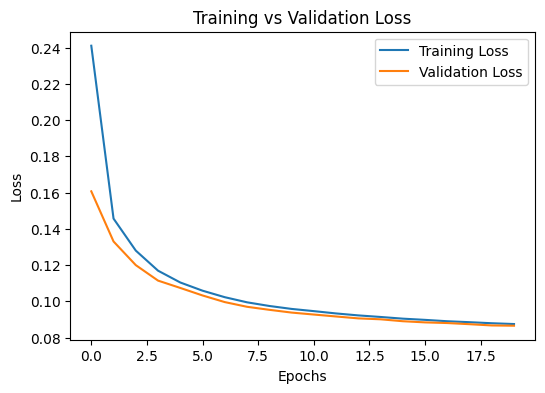

In [8]:
# ---------------------------
# Model Summary
# ---------------------------
autoencoder.summary()

# ---------------------------
# Plot Training & Validation Loss
# ---------------------------
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


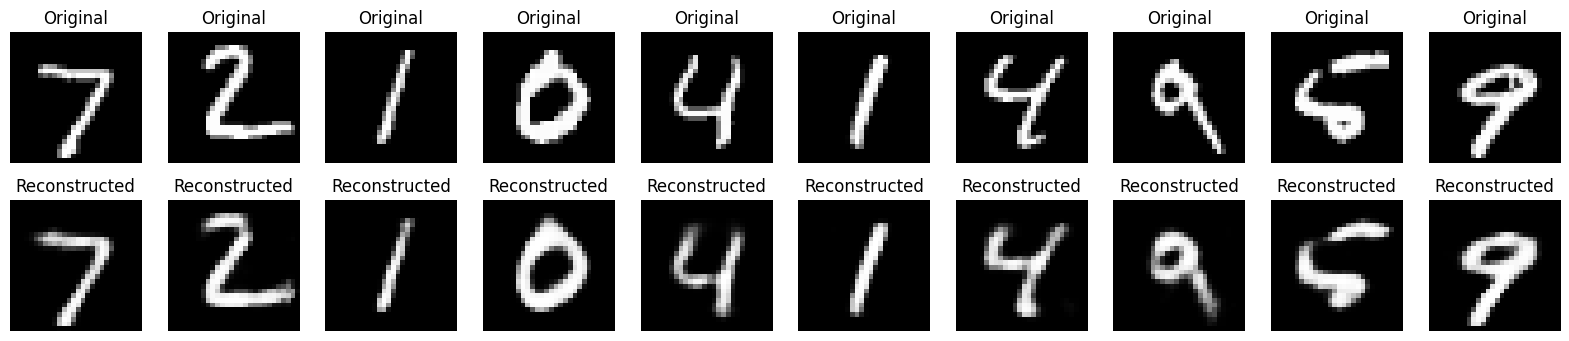

In [9]:
# ---------------------------
# Reconstruction Results
# ---------------------------
reconstructed = autoencoder.predict(x_test)

n = 10  # number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed[i].reshape(28, 28), cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()


The autoencoder successfully compresses each 28×28 MNIST image into a 64-dimensional latent vector and reconstructs it back.
The loss curves show that both training and validation losses decrease smoothly, indicating effective learning without significant overfitting.

When we compare original and reconstructed digits, we can see that the reconstructions clearly resemble the original handwritten digits, though slightly blurred due to compression. This demonstrates the ability of the autoencoder to learn meaningful lower-dimensional representations while preserving the essential features of the digits.